Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection & Processing

In [3]:
#loading the csv data to a pandas dataframe
gold_data = pd.read_csv('gold.csv')

In [4]:
#print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
#print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
#getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [11]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
#correlation
correlation = gold_data.drop('Date', axis=1).corr()

In [17]:
#constructing a heatmap to understand the correlation

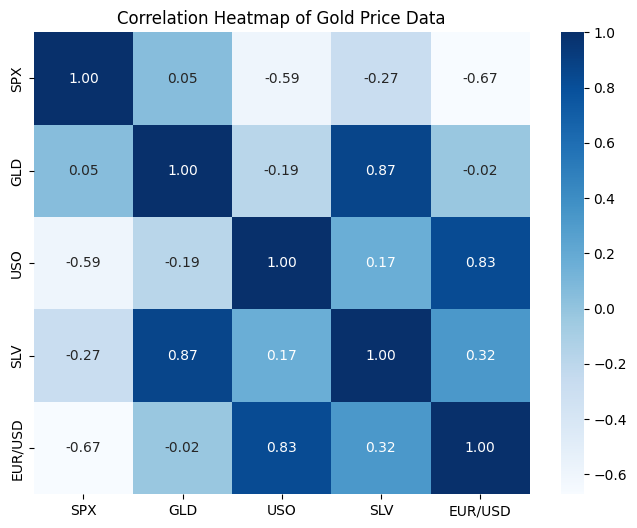

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Gold Price Data')
plt.show()

In [19]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-1596612005.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

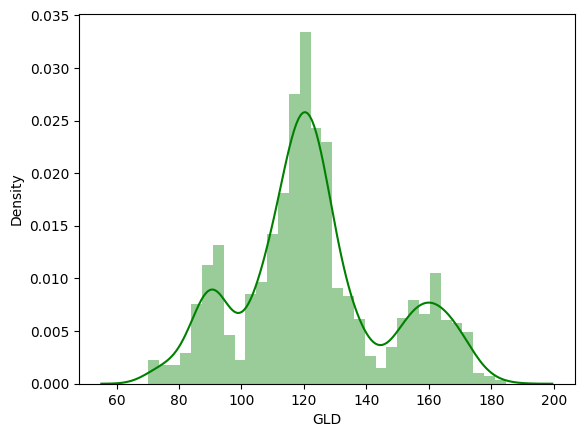

In [20]:
#check the distribution of the gold price
sns.distplot(gold_data['GLD'], color='green')

Splitting The Features & Target

In [21]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [22]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting Into Training Data & Test Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training

Random Forest Regressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [28]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[168.60789933  82.00349982 115.9574003  127.69690069 120.77860116
 154.76879716 150.52369927 126.22290024 117.36399882 125.91820099
 116.80780108 171.6033008  141.51509833 167.90319879 115.09570001
 117.46060041 138.75060311 170.13960122 159.09740285 158.8047988
 155.15699975 125.22050055 175.69199994 157.24040365 125.25980065
  93.85559953  77.44059998 120.31930014 119.05859892 167.13089981
  88.26320044 124.9956998   91.08880058 117.63890026 120.97709911
 136.17410084 115.21580128 114.95190073 147.35090014 107.216001
 104.16590259  87.30669786 126.51030069 117.75390015 153.17269901
 119.59180029 108.37599989 108.23589814  93.21490075 127.19169768
  75.11940022 113.67959958 121.66760031 111.22629901 118.94369906
 120.82469939 158.73160114 168.49210101 146.82429685  85.74229854
  94.31820042  86.93989894  90.53290037 119.07050079 126.54530044
 127.41160001 168.92489955 122.37969921 117.58499857  98.53470036
 168.24830214 142.97889841 132.23610336 121.13330201 121.23059979
 119.81560042

In [30]:
#R suqared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891727900748736


Compare The Actual Values & Predicted Values In A Plot


In [32]:
#covert to a list
Y_test = list(Y_test)

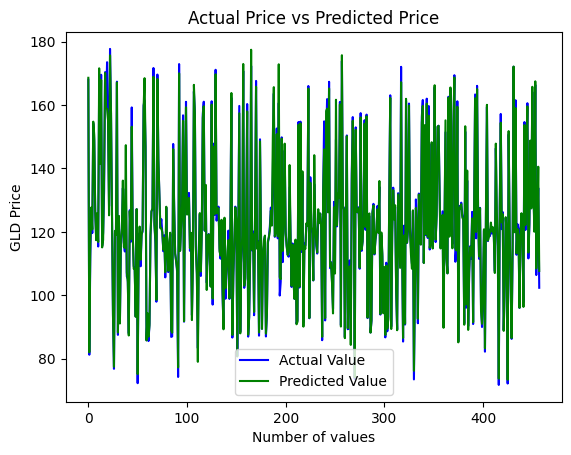

In [34]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()